Earlier we deal with numerical MISSING VALUES(NA), but what about Missing CATEGORICAL VALUE
Here we are going to learn:


1) Replacing missing CATEGORICAL valus with the most frequent one 

2)Then convert the Missing values to NUMERIC


Here Were are using House Price dataset

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('/Users/nandrajog/Downloads/House-price.csv',low_memory=False)

In [3]:
data.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [4]:
croped_data = data[['BsmtQual','FireplaceQu','GarageType','SalePrice']]

In [5]:
croped_data.isna().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [6]:
croped_data

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [7]:
pd.DataFrame(croped_data.isna().sum())

,0
BsmtQual,37
FireplaceQu,690
GarageType,81
SalePrice,0


In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(croped_data[['BsmtQual','FireplaceQu','GarageType']],
                                                 croped_data.SalePrice,train_size = 0.8,random_state=0)

Text(0.5, 0, 'BsmtQual')

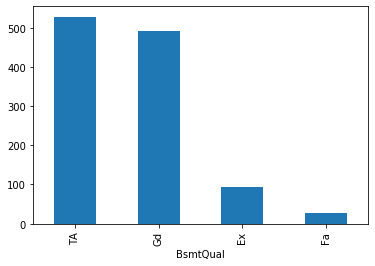

In [9]:
X_train['BsmtQual'].value_counts(ascending=False).plot.bar()
plt.xlabel('BsmtQual')

Text(0.5, 0, 'FireplaceQu')

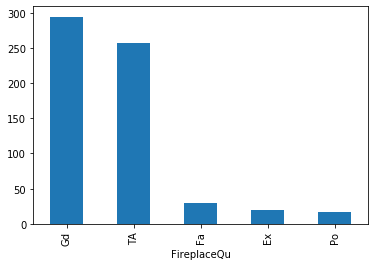

In [10]:
X_train['FireplaceQu'].value_counts(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')

Text(0.5, 0, 'GarageType')

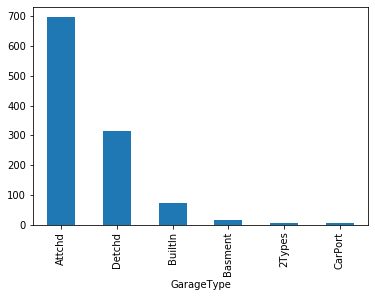

In [11]:
X_train['GarageType'].value_counts(ascending=False).plot.bar()
plt.xlabel('GarageType')

In [12]:
X_train['GarageType'].value_counts(ascending=False).index[0]

'Attchd'

In [13]:
X_test['GarageType'].value_counts(ascending=False)

Attchd     174
Detchd      72
BuiltIn     14
Basment      5
CarPort      4
Name: GarageType, dtype: int64

Lets Create A function and fill the Missing value by the most frequent

In [14]:
def Impute_na(df,col,most_frequent):
    df[col] = df[col].fillna(most_frequent)

In [15]:
Impute_na(X_train,'BsmtQual','TA')
Impute_na(X_test,'BsmtQual','TA')
Impute_na(X_train,'FireplaceQu','Gd')
Impute_na(X_test,'FireplaceQu','Gd')
Impute_na(X_train,'GarageType','Attchd')
Impute_na(X_test,'GarageType','Attchd')

In [16]:
X_train.isna().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
dtype: int64

In [17]:
X_train.loc[64]

BsmtQual           Gd
FireplaceQu        Gd
GarageType     Attchd
Name: 64, dtype: object

In [18]:
# for col in ['BsmtQual','FireplaceQu','GarageType']:
#     for i ,k in enumerate(X_train[col].unique(),0):
        
#         print(k)

In [19]:
# X_train

In [20]:
# X_train.BsmtQual.value_counts()

In this below code we create a DICT and use MAP function to replace Categorical variables with NUMERIC values

In [21]:
for col in ['BsmtQual','FireplaceQu','GarageType']:
    labels_dict = {k:i for i,k in enumerate (X_train[col].unique())}
    print(labels_dict)
    X_train.loc[:,col] = X_train.loc[:,col].map(labels_dict)
    X_test.loc[:,col] = X_test.loc[:,col].map(labels_dict)

{'Ex': 0, 'TA': 1, 'Gd': 2, 'Fa': 3}
{'Gd': 0, 'TA': 1, 'Ex': 2, 'Po': 3, 'Fa': 4}
{'Attchd': 0, 'Detchd': 1, 'BuiltIn': 2, 'Basment': 3, '2Types': 4, 'CarPort': 5}


In [22]:
X_test

,BsmtQual,FireplaceQu,GarageType
529,1,1,0
491,1,1,0
459,1,1,1
279,2,1,0
655,1,0,1
...,...,...,...
326,2,0,0
440,0,0,0
1387,1,0,1
1323,1,0,0


In [23]:
X_train

,BsmtQual,FireplaceQu,GarageType
618,0,0,0
870,1,0,1
92,2,0,1
817,2,0,0
302,2,1,0
...,...,...,...
763,2,0,0
835,2,0,0
1216,1,0,0
559,2,1,0


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [25]:
clf = LinearRegression()
clf.fit(X_train,Y_train)
predict_train = clf.predict(X_train)
print("Train Set")
print("MSE {}".format(mean_squared_error(predict_train,Y_train)))
print("Test Set")
predict_test = clf.predict(X_test)
print("MSE {}".format(mean_squared_error(predict_test,Y_test)))

Train Set
MSE 5945910923.453074
Test Set
MSE 6569703369.803234


In [26]:
croped_data.isna().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [62]:
X_train,X_test,Y_train,Y_test = train_test_split(croped_data[['BsmtQual','FireplaceQu','GarageType','SalePrice']],
                                                 croped_data.SalePrice,train_size = 0.8,random_state=0)

In [63]:
X_train.isnull().sum()

BsmtQual        28
FireplaceQu    551
GarageType      58
SalePrice        0
dtype: int64

In [64]:
X_train['FireplaceQu'].value_counts()

Gd    295
TA    257
Fa     29
Ex     19
Po     17
Name: FireplaceQu, dtype: int64

This plot represent Avg house price wrt FireplaceQu without missing value

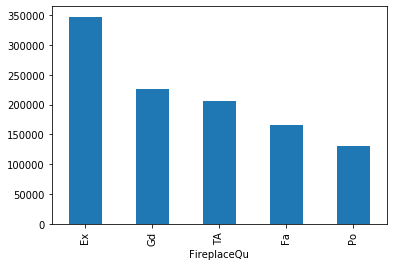

In [65]:
X_train.groupby(['FireplaceQu'])['SalePrice'].mean().sort_values(ascending=False).plot.bar()

Compare Avg house price when variable has missing value

In [66]:
X_train[X_train.FireplaceQu.isnull()]['SalePrice'].mean()

141205.3666061706

Here what we observ that The avg price of house in GD category is above 200000 whereas the avg price of the houses with missing observation is 141205 

Plot the distribution

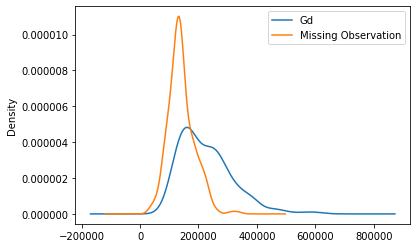

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train[X_train.FireplaceQu == 'Gd']['SalePrice'].plot(kind ='kde',ax=ax)
X_train[X_train.FireplaceQu.isnull()]['SalePrice'].plot(kind = 'kde' ,ax=ax)
lines,lables = ax.get_legend_handles_labels()
labels = ['Gd', 'Missing Observation']
ax.legend(lines,labels , loc= 'best')

Let's Plot the distribution by filling NA with most frequent value

In [68]:
# def Imputer_na(df,value,)

In [69]:
# Impute_na(X_train,'FireplaceQu','Gd')

In [70]:
def Impute_na(df,variable,missing_value):
    df[variable+'_'+ missing_value] = df[variable].fillna(missing_value)

In [74]:
Impute_na(X_train,'FireplaceQu','Gd')

In [75]:
X_train

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_Gd
618,Ex,Gd,Attchd,314813,Gd
870,TA,NaN,Detchd,109500,Gd
92,Gd,NaN,Detchd,163500,Gd
817,Gd,Gd,Attchd,271000,Gd
302,Gd,TA,Attchd,205000,TA
...,...,...,...,...,...
763,Gd,Gd,Attchd,337000,Gd
835,Gd,NaN,Attchd,128000,Gd
1216,NaN,NaN,Attchd,112000,Gd
559,Gd,TA,Attchd,234000,TA


In [76]:
X_train.isna().sum()

BsmtQual           28
FireplaceQu       551
GarageType         58
SalePrice           0
FireplaceQu_Gd      0
dtype: int64

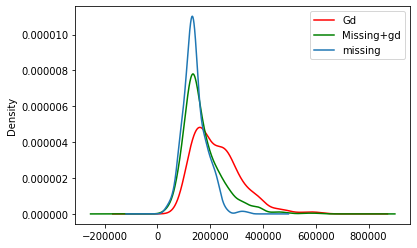

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train[X_train.FireplaceQu == 'Gd']['SalePrice'].plot(kind='kde',ax=ax,color = 'red')
X_train[X_train.FireplaceQu_Gd=='Gd']['SalePrice'].plot(kind='kde',ax=ax,color='green')
X_train[X_train.FireplaceQu.isna()]['SalePrice'].plot(kind='kde',ax=ax)
lines,labels = ax.get_legend_handles_labels()
labels = ['Gd','Missing+gd', 'missing']
ax.legend(lines,labels)